In [2]:
import datascience
import numpy as np
import pandas as pd
import graphviz
from datascience import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'



In [34]:
Ben_pass= pd.read_csv('Ben-NE-9-10-2015-pass-6.csv', sep=",")

In [35]:
print(Ben_pass)

    down  ydstogo  Yards.Gained.PrevPlay  AirYards  PassLocation  PassOutcome
0      1       10                     18        -4             1            1
1      1       10                      0         9             1            1
2      3       22                      6         1             1            1
3      1       10                      0         7            -1            1
4      1       10                     13         6            -1            1
5      1       10                     12         7            -1            1
6      1       10                      0         5             1            0
7      2       10                      0        25             1            0
8      3        5                     -1         6            -1            1
9      1       15                      4        -1             1            1
10     3       18                     -6        17            -1            1
11     1       20                      5         5            -1

In [36]:
X= Ben_pass.values[:,0:4]
print(X)

[[ 1 10 18 -4]
 [ 1 10  0  9]
 [ 3 22  6  1]
 [ 1 10  0  7]
 [ 1 10 13  6]
 [ 1 10 12  7]
 [ 1 10  0  5]
 [ 2 10  0 25]
 [ 3  5 -1  6]
 [ 1 15  4 -1]
 [ 3 18 -6 17]
 [ 1 20  5  5]
 [ 2 11  9  4]
 [ 2 13 -3 -2]
 [ 3  6  7  6]
 [ 2  7  0 11]
 [ 1 10 13 16]
 [ 1 10 19  6]
 [ 2  8  2  0]
 [ 3  8  0 39]
 [ 3  3  1 19]
 [ 1 10  0 11]
 [ 2 10  0 17]
 [ 1 10 18  7]
 [ 1  9  2  4]
 [ 2  6  3  6]
 [ 1 10  0  5]
 [ 2 15  9  4]
 [ 3  6  9 26]
 [ 2  8  2  0]
 [ 3  3  5 23]
 [ 4  3  0  4]
 [ 2  5  5 26]
 [ 3  5  0  7]
 [ 1 10  0  4]
 [ 3  5  1  5]
 [ 2  1  9 -1]
 [ 2  1  0  0]
 [ 1 10 28 23]
 [ 1 10 13 -5]
 [ 2 15 -5  7]
 [ 3  6 -1  2]
 [ 1 10  0 25]
 [ 2  5  5  2]
 [ 2  8  0  1]
 [ 1  1  0  1]
 [ 1 10  0 18]
 [ 1 10  0 27]
 [ 3  5  5  4]
 [ 2  1  0  1]
 [ 3  1  0  1]
 [ 2  3  7  9]
 [ 3  3  0  9]
 [ 2 12 -2 23]
 [ 3 12  0  6]
 [ 1 10  0 18]
 [ 1 10 18 39]
 [ 2  9  1  7]
 [ 3  4  3 -3]
 [ 1 10  0 11]
 [ 2 10  0  4]
 [ 3  1  9  6]
 [ 1 10  0 29]
 [ 2 10  0  1]
 [ 3  8  2 13]
 [ 2 27 -7 14]
 [ 3  9  0

In [37]:
Y= Ben_pass.values[:,5]
print(Y)

[1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1]


In [38]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [39]:
print(X_test)

[[ 1 10 13 -5]
 [ 1 10  0  5]
 [ 1 10 18  7]
 [ 1 10 18 39]
 [ 1 10 28 23]
 [ 3  8  2 13]
 [ 1 10  0 18]
 [ 1 20  5  5]
 [ 2  8  2  0]
 [ 3  4  3 -3]
 [ 2 27 -7 14]
 [ 1 10 12  7]
 [ 3  3  1 19]
 [ 1 10 11 11]
 [ 1 10 18 -4]
 [ 3  6  9 26]
 [ 2 11  9  4]
 [ 1 10  0  5]
 [ 3  6 -1  2]
 [ 2  5  5 26]
 [ 3 12  0  6]]


In [40]:
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 100,
                               max_depth=5, min_samples_leaf=2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [41]:
dot_data= tree.export_graphviz(clf, out_file=None, feature_names=('down','ydstogo','YardsGainedPrevPlay','AirYards'))

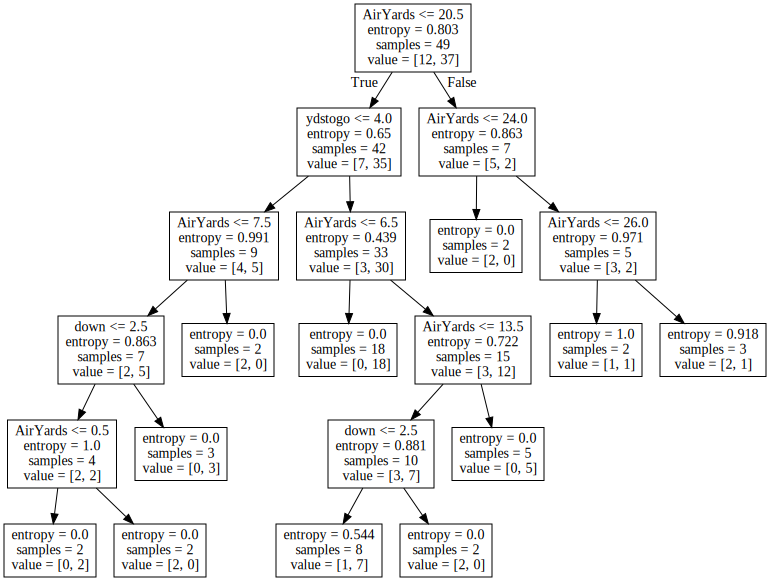

In [44]:
graph = graphviz.Source(dot_data)
graph

In [45]:
graph.render('BenPassTree3')

'BenPassTree3.pdf'

In [46]:
X_train

array([[ 3,  3,  5, 23],
       [ 1, 10, 19,  6],
       [ 3,  5,  0,  7],
       [ 1, 10,  0, 11],
       [ 2,  9,  1,  7],
       [ 2, 15, -5,  7],
       [ 3,  1,  0,  1],
       [ 2,  6,  3,  6],
       [ 1, 10,  0, 27],
       [ 2,  3,  7,  9],
       [ 2,  1,  0,  0],
       [ 3,  5,  1,  5],
       [ 1, 10,  0, 11],
       [ 1, 10,  0, 25],
       [ 2, 10,  0, 25],
       [ 1, 10,  0,  7],
       [ 1, 10,  0, 18],
       [ 1,  1,  0,  1],
       [ 1, 10,  0, 29],
       [ 3,  8,  0, 39],
       [ 2, 13, -3, -2],
       [ 1, 10,  0,  9],
       [ 4,  3,  0,  4],
       [ 1, 10, 13,  6],
       [ 2,  8,  0,  1],
       [ 2, 15,  9,  4],
       [ 3,  1,  9,  6],
       [ 2, 10,  0, 17],
       [ 2,  8,  2,  0],
       [ 1, 15,  4, -1],
       [ 1, 10, 13, 16],
       [ 2,  5,  5,  2],
       [ 2,  1,  9, -1],
       [ 2,  7,  0, 11],
       [ 1, 10,  0, 11],
       [ 3,  9,  0, 12],
       [ 2,  1,  0,  1],
       [ 2, 10,  0,  4],
       [ 3,  6,  7,  6],
       [ 2, 10,  0,  1],


In [47]:
X_test

array([[ 1, 10, 13, -5],
       [ 1, 10,  0,  5],
       [ 1, 10, 18,  7],
       [ 1, 10, 18, 39],
       [ 1, 10, 28, 23],
       [ 3,  8,  2, 13],
       [ 1, 10,  0, 18],
       [ 1, 20,  5,  5],
       [ 2,  8,  2,  0],
       [ 3,  4,  3, -3],
       [ 2, 27, -7, 14],
       [ 1, 10, 12,  7],
       [ 3,  3,  1, 19],
       [ 1, 10, 11, 11],
       [ 1, 10, 18, -4],
       [ 3,  6,  9, 26],
       [ 2, 11,  9,  4],
       [ 1, 10,  0,  5],
       [ 3,  6, -1,  2],
       [ 2,  5,  5, 26],
       [ 3, 12,  0,  6]], dtype=int64)

In [48]:
predicted_completion = clf.predict(X_test)

In [49]:
print(predicted_completion)

[1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1]


In [50]:
print(y_test)

[1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0]


In [51]:
np.mean(predicted_completion == y_test)

0.66666666666666663

In [52]:
print(metrics.classification_report(y_test, predicted_completion))

             precision    recall  f1-score   support

          0       0.50      0.43      0.46         7
          1       0.73      0.79      0.76        14

avg / total       0.66      0.67      0.66        21



In [53]:
metrics.confusion_matrix(y_test, predicted_completion)

array([[ 3,  4],
       [ 3, 11]], dtype=int64)